<a href="https://colab.research.google.com/github/Nicolas-Hanoun/Projet_AirBnB/blob/main/projet_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import bs4
import urllib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

SCRAPPING NON UTILISE ENCORE


In [ ]:
url_bnb = "https://data.opendatasoft.com/explore/embed/dataset/airbnb-listings@public/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=Paris"    

from urllib import request

request_text = request.urlopen(url_bnb).read()
print(request_text[:1000])    
type(request_text)
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

b'\n<!DOCTYPE html>\n<html lang="en">\n    <head>\n    \n    \n\n    \n        <title>Opendatasoft</title>\n        <link rel="stylesheet" type="text/css" href="/static/vendor/font-awesome-4.7.0/css/font-awesome.min.css">\n        <link rel="stylesheet" type="text/css" href="/static/vendor/normalize/normalize.css">\n        <link rel="stylesheet" href="/static/pictos/odsui/odsui.css" type="text/css">\n\n        <meta charset="UTF-8"/>\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <meta http-equiv="Content-Language" content="en">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        \n<link rel="shortcut icon" href="https://s3-eu-west-1.amazonaws.com/aws-ec2-eu-1-opendatasoft-staticfileset/centralstore/favicon?tstamp=155775386516">\n\n\n\n        <!--[if lte IE 9]>\n            <script>\n            // Stub the console object to avoid accidental leftover logs breaking IE <=9\n            if (!window.console) window.console =

In [ ]:
print(page.find("table"))

None


# CREATION DE LA BASE DE DONNEES

In [3]:
df=pd.read_csv("/content/drive/My Drive/ProjetPython/airbnb-listings.csv",sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df=df.drop(["ID",	"Listing Url","Thumbnail Url",	"Medium Url","Picture Url","XL Picture Url","Host Thumbnail Url","Host Picture Url","Host Verifications","Host Response Rate","Experiences Offered","Host URL","Has Availability","Listing Url"],axis=1)
df.head()

,Scrape ID,Last Scraped,Name,Summary,Space,Description,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,20170404145355,2017-04-05,Studio au coeur du Marais,Mon logement est proche de Le Marais hôtel de ...,NaN,Mon logement est proche de Le Marais hôtel de ...,NaN,NaN,NaN,NaN,NaN,NaN,24191865,Chantal,2014-11-26,FR,NaN,NaN,NaN,Le Marais,1.0,1.0,"Le Marais, Paris, Île-de-France 75004, France",Le Marais,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.858029,2.356088,Apartment,Entire home/apt,2,0.5,1.0,1.0,Pull-out Sofa,"Heating,Smoke detector,Essentials,Lock on bedr...",NaN,40.0,NaN,NaN,300.0,20.0,1,0,5,60,9 months ago,0,0,0,0,2017-04-05,2,2016-06-10,2016-08-05,90.0,8.0,9.0,10.0,10.0,10.0,10.0,NaN,Paris,flexible,1,0.20,"48.8580288026,2.35608793562","Host Has Profile Pic,Is Location Exact,Instant..."
1,20170404145355,2017-04-06,Cozy appart in the centre of Paris,Mon logement est parfait pour les voyageurs en...,NaN,Mon logement est parfait pour les voyageurs en...,NaN,NaN,NaN,NaN,NaN,NaN,48696740,Anairda,2015-11-10,"Barcelona, Catalonia, Spain",Hello,NaN,NaN,Saint-Paul - Ile Saint-Louis,1.0,1.0,"Saint-Paul - Ile Saint-Louis, Paris, Île-de-Fr...",Saint-Paul - Ile Saint-Louis,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.855097,2.358116,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",NaN,140.0,NaN,NaN,NaN,NaN,1,0,1,15,4 months ago,28,58,88,363,2017-04-06,1,2016-12-24,2016-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,Paris,flexible,1,0.29,"48.8550970759,2.35811648834","Host Has Profile Pic,Host Identity Verified,Is..."
2,20170404145355,2017-04-06,"Bastille apartment, view of Paris!","45 m2 apartment in the heart of Paris, on a qu...",Spacious and bright apartment of 45 m2 consist...,"45 m2 apartment in the heart of Paris, on a qu...",La place de la Bastille est le lieu régulier d...,NaN,"Metro 1, 5, 8: Bastille Station 5 minutes walk...",NaN,NaN,"We live a quiet and kept building, so we hope ...",37690260,Sony,2015-07-06,"Paris, Île-de-France, France",NaN,NaN,NaN,IV Arrondissement,1.0,1.0,"IV Arrondissement, Paris, Île-de-France 75004,...",IV Arrondissement,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.849847,2.365706,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",NaN,70.0,NaN,NaN,NaN,10.0,4,15,1,1125,21 months ago,0,0,0,0,2017-04-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,strict,1,NaN,"48.8498465526,2.36570613737","Host Has Profile Pic,Is Location Exact"
3,20170404145355,2017-04-06,STUNNING 2BR HEART MARAIS 2 BATHS,Enjoy le charme à la française of this elegant...,2 quiet bedrooms with daylight 2 superb bathro...,Enjoy le charme à la française of this elegant...,NaN,NaN,NaN,NaN,"My touch: Excellence of service, a warm welcom...",NaN,261355,Pascal,2010-10-14,"Paris, Ile-de-France, France",My goal is simple: Provide a top-notch service...,within an hour,NaN,Le Marais,9

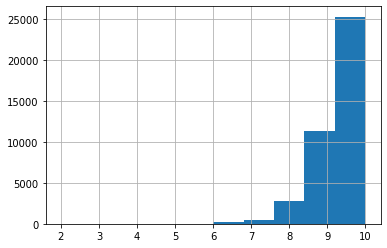

In [ ]:
df["Review Scores Location"].hist()

# RECUPERATION DE LA VARIABLE SQUARE FEET A PARTIR DES VARIABLES TEXTES DE LA VARIABLE "DESCRIPTION"

In [ ]:
df2=df.copy()
df2['Intermediaire']=df2["Description"]
df2.head()

,Scrape ID,Last Scraped,Name,Summary,Space,Description,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Intermediaire
0,20170404145355,2017-04-05,Studio au coeur du Marais,Mon logement est proche de Le Marais hôtel de ...,NaN,Mon logement est proche de Le Marais hôtel de ...,NaN,NaN,NaN,NaN,NaN,NaN,24191865,Chantal,2014-11-26,FR,NaN,NaN,NaN,Le Marais,1.0,1.0,"Le Marais, Paris, Île-de-France 75004, France",Le Marais,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.858029,2.356088,Apartment,Entire home/apt,2,0.5,1.0,1.0,Pull-out Sofa,"Heating,Smoke detector,Essentials,Lock on bedr...",NaN,40.0,NaN,NaN,300.0,20.0,1,0,5,60,9 months ago,0,0,0,0,2017-04-05,2,2016-06-10,2016-08-05,90.0,8.0,9.0,10.0,10.0,10.0,10.0,NaN,Paris,flexible,1,0.20,"48.8580288026,2.35608793562","Host Has Profile Pic,Is Location Exact,Instant...",Mon logement est proche de Le Marais hôtel de ...
1,20170404145355,2017-04-06,Cozy appart in the centre of Paris,Mon logement est parfait pour les voyageurs en...,NaN,Mon logement est parfait pour les voyageurs en...,NaN,NaN,NaN,NaN,NaN,NaN,48696740,Anairda,2015-11-10,"Barcelona, Catalonia, Spain",Hello,NaN,NaN,Saint-Paul - Ile Saint-Louis,1.0,1.0,"Saint-Paul - Ile Saint-Louis, Paris, Île-de-Fr...",Saint-Paul - Ile Saint-Louis,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.855097,2.358116,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",NaN,140.0,NaN,NaN,NaN,NaN,1,0,1,15,4 months ago,28,58,88,363,2017-04-06,1,2016-12-24,2016-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,Paris,flexible,1,0.29,"48.8550970759,2.35811648834","Host Has Profile Pic,Host Identity Verified,Is...",Mon logement est parfait pour les voyageurs en...
2,20170404145355,2017-04-06,"Bastille apartment, view of Paris!","45 m2 apartment in the heart of Paris, on a qu...",Spacious and bright apartment of 45 m2 consist...,"45 m2 apartment in the heart of Paris, on a qu...",La place de la Bastille est le lieu régulier d...,NaN,"Metro 1, 5, 8: Bastille Station 5 minutes walk...",NaN,NaN,"We live a quiet and kept building, so we hope ...",37690260,Sony,2015-07-06,"Paris, Île-de-France, France",NaN,NaN,NaN,IV Arrondissement,1.0,1.0,"IV Arrondissement, Paris, Île-de-France 75004,...",IV Arrondissement,Hôtel-de-Ville,NaN,Paris,Île-de-France,75004,Paris,"Paris, France",FR,France,48.849847,2.365706,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",NaN,70.0,NaN,NaN,NaN,10.0,4,15,1,1125,21 months ago,0,0,0,0,2017-04-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,strict,1,NaN,"48.8498465526,2.36570613737","Host Has Profile Pic,Is Location Exact","45 m2 apartment in the heart of Paris, on a qu..."
3,20170404145355,2017-04-06,STUNNING 2BR HEART MARAIS 2 BATHS,Enjoy le charme à la française of this elegant...,2 quiet bedrooms with daylight 2 superb bathro...,Enjoy le charme à la française of this elegant...,NaN,NaN,NaN,NaN,"My touch: Excellence of s

In [ ]:
def bon_format(x):
  
  if len(x)>=4 or len(x)<=1 or x=='de'or x[:2]=='sq' or x=="50+" or x=='""':
    y=np.NaN  
  elif x.find("(")==0 or x.find(',')==0 or x.find('a')==0 or x.find('/')==0:
    y=int(x[1:])
  else : 
    x=x.replace(",",".")
    x=x.replace("O","0")
    y=float(x)
  return(y)


def transformation(x):
  if type(x)==str :
      L=x.split(" ")
      if "m2" in L :
        i=L.index("m2")
        x=L[i-1]
        y=bon_format(x)
        return(y)
      elif "m^2" in L :
        i=L.index("m^2")
        x=(L[i-1])
        y=bon_format(x)
        return(y)
      else: 
        return(np.NaN)
    

In [ ]:
df2['Intermediaire']=df2['Intermediaire'].apply(transformation)
df2['Intermediaire']

0         NaN
1         NaN
2        45.0
3         NaN
4         NaN
         ... 
54508     NaN
54509     NaN
54510     NaN
54511     NaN
54512     NaN
Name: Intermediaire, Length: 54513, dtype: float64

In [ ]:
df5=pd.concat([df2['Intermediaire'],df2['Square Feet']],axis=1)
df5['Intermediaire'].fillna(0, inplace=True)
df5['Square Feet'].fillna(0, inplace=True)

df5['sum'] = df5.loc[(df5['Intermediaire'] ==0) | (df5['Square Feet'] ==0),['Intermediaire','Square Feet']].sum(axis=1)
df5.head(50)




,Intermediaire,Square Feet,sum
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,45.0,0.0,45.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [ ]:
df5['sum']=df5['sum'].replace(0, np.nan)

df5.head()



array([ 40., 140., 276.,  85., 220., 120.,  95., 150., 105.,  83., 149.,
        60., 198.,  70., 700.,  69., 130., 135., 267., 119.,  99.,  80.,
       180., 110.,  89.,  50., 115., 155., 109., 260.,  58., 137.,  90.,
        65.,  75., 100.,  39.,  52.,  49., 145.,  45.,  26.,  43., 185.,
        29., 315., 112., 104., 179.,  78., 200., 131., 159.,  27.,  55.,
        61., 134.,  34.,  36.,  72., 290., 190., 350.,  59.,  48.,  64.,
        92.,  46., 138.,  79.,  35., 139., 165.,  38., 129.,  41.,  25.,
       199.,  97.,  33., 213., 300., 288., 305.,  87., 187.,  57., 285.,
       184., 125., 230., 310., 175., 193.,  91., 414., 262., 497.,  73.,
       250., 169.,  93., 151., 188., 117.,  47., 127.,  86., 789.,  56.,
       650.,  84.,  30., 316.,  51., 132.,  28., 108.,  54., 565., 113.,
       103.,  63., 116.,  62., 227., 450., 255.,  96.,  68.,  37., 240.,
       280., 118.,  42.,  24.,  53., 128.,  88.,  76.,  66.,  98., 170.,
       520., 360., 160.,  81., 166., 245., 405., 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


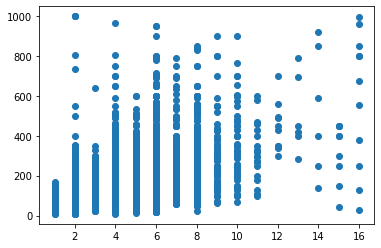

In [ ]:

df_bnb=df[Total]
df_bnb["Square Feet"]=df5['sum'].loc[df5['sum']<500]

plt.scatter(df_bnb["Accommodates"], df_bnb['Price'])
plt.show()

# Random Forest

In [ ]:
Objective=["Price","Property Type","Accommodates","Bathrooms","Bedrooms","Beds","Bed Type"]
Total=["Price","Neighbourhood","Neighbourhood Cleansed","City","State","Market","Property Type","Room Type","Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Square Feet","Guests Included","Extra People","Minimum Nights","Number of Reviews","First Review","Review Scores Rating","Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location","Review Scores Value"]

In [ ]:
df_bnb=df[Total]
# df_bnb["Square Feet"]=df5['sum']

df_bnb.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,Neighbourhood,Neighbourhood Cleansed,City,State,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Guests Included,Extra People,Minimum Nights,Number of Reviews,First Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,NewPrice
0,40.0,Le Marais,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,2,0.5,1.0,1.0,Pull-out Sofa,NaN,1,0,5,2,2016-06-10,90.0,8.0,9.0,10.0,10.0,10.0,10.0,"(35.0, 40.0]"
1,140.0,Saint-Paul - Ile Saint-Louis,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,NaN,1,0,1,1,2016-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"(120.0, 140.0]"
2,70.0,IV Arrondissement,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,4,15,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(65.0, 70.0]"
3,276.0,Le Marais,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,NaN,1,0,6,25,2015-09-27,98.0,10.0,10.0,10.0,10.0,10.0,10.0,"(220.0, 999.0]"
4,85.0,Le Marais,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,NaN,1,14,1,210,2014-04-13,84.0,9.0,9.0,9.0,9.0,10.0,9.0,"(80.0, 85.0]"


In [ ]:
c="Price;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Host Location;Street;Neighbourhood;Neighbourhood Cleansed;Neighbourhood Group Cleansed;City;State;Market;Smart Location;Country Code;Country;Property Type;Room Type;Accommodates;Bathrooms;Bedrooms;Beds;Bed Type;Square Feet;Weekly Price;Monthly Price;Security Deposit;Cleaning Fee;Guests Included;Extra People;Minimum Nights;Maximum Nights;Has Availability;Number of Reviews;First Review;Last Review;Review Scores Rating;Review Scores Accuracy;Review Scores Cleanliness;Review Scores Checkin;Review Scores Communication;Review Scores Location;Review Scores Value;".replace(";",'","')

In [ ]:
df_final = df_bnb.dropna()
#df_final=df_final.loc[df_final["Price"] <= 200]
# df_final=df_final.loc[df_final["Price"] >= 50]

In [ ]:
L=["Property Type","Bed Type"]
for x in L:
  le=LabelEncoder()
  df_final[x] = le.fit_transform(df_final[x])
# df_final=df_final.drop(["First Review"],axis=1)
df_final.head()

,Price,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type
0,40.0,0,2,0.5,1.0,1.0,3
1,140.0,0,1,1.0,0.0,1.0,4
2,70.0,0,4,1.0,1.0,2.0,4
4,85.0,0,3,1.0,1.0,2.0,4
6,120.0,0,2,1.0,1.0,1.0,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(["Price","NewPrice"], axis=1), df_final["NewPrice"])
print (y_test)

46320     57.5000
34814     94.5000
16393     17.4995
27777    130.0000
42744     47.5000
           ...   
10714     57.5000
42317     37.5000
31409    152.0000
27955     47.5000
49391     57.5000
Name: NewPrice, Length: 13629, dtype: category
Categories (19, float64): [17.4995 < 37.5000 < 42.5000 < 47.5000 ... 130.0 < 152.0 < 192.0 < 609.5]


In [ ]:
regr=RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)

In [ ]:
regr.score(X_test,y_test)

0.4938054057949529

In [ ]:
regr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [ ]:
T=y_test.to_numpy().tolist()
P=y_pred.tolist()
L=[]
for i in range (807):
  L.append(abs(P[i]-T[i])/T[i])



In [ ]:
Y=pd.Series(y_pred)
df_visio=pd.concat([y_test.reset_index(),Y],axis=1)

In [ ]:
print(df_visio)
print(np.mean(L))

     index  Price       0
0    12399   60.0   76.90
1    50297   55.0   61.69
2    39244  115.0  109.27
3    25561   55.0   65.62
4     5801  122.0   95.08
..     ...    ...     ...
802  25305  155.0  123.59
803  49748  199.0  240.27
804   5898   70.0   83.25
805  16431  200.0  254.74
806  32121  100.0   96.66

[807 rows x 3 columns]
0.6869068094655173


# Random Forest Classifier 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(["Price","NewPrice"], axis=1), df_final["NewPrice"])
print (y_test)

35171    (120.0, 140.0]
48753      (55.0, 60.0]
13443    (140.0, 164.0]
47497      (90.0, 99.0]
40461      (65.0, 70.0]
              ...      
3289       (50.0, 55.0]
18793      (70.0, 75.0]
21224      (50.0, 55.0]
19965    (220.0, 999.0]
18998    (-0.001, 35.0]
Name: NewPrice, Length: 13629, dtype: category
Categories (19, interval[float64]): [(-0.001, 35.0] < (35.0, 40.0] < (40.0, 45.0] < (45.0, 50.0] < ... <
                                     (120.0, 140.0] < (140.0, 164.0] < (164.0, 220.0] <
                                     (220.0, 999.0]]


In [ ]:
regrClass=RandomForestClassifier()
regrClass.fit(X_train, y_train)
y_pred=regr.predict(X_test)

ValueError: ignored

# ACP

In [ ]:
import seaborn as sns

In [ ]:
df_bnb=df[["Price","Property Type","Neighbourhood Cleansed","Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Square Feet","Guests Included","Extra People"]]
df_bnb["Square Feet"]=df5['sum']
df_final = df_bnb.dropna()
df_final.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price,Property Type,Neighbourhood Cleansed,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Guests Included,Extra People
2,70.0,Apartment,Hôtel-de-Ville,4,1.0,1.0,2.0,Real Bed,45.0,4,15
13,83.0,Apartment,Hôtel-de-Ville,2,1.0,1.0,1.0,Real Bed,269.0,1,0
15,149.0,Apartment,Hôtel-de-Ville,4,1.0,1.0,2.0,Real Bed,431.0,2,10
20,70.0,Apartment,Hôtel-de-Ville,2,1.0,1.0,1.0,Couch,20.0,1,10
22,69.0,Apartment,Hôtel-de-Ville,2,1.0,1.0,1.0,Real Bed,269.0,1,5


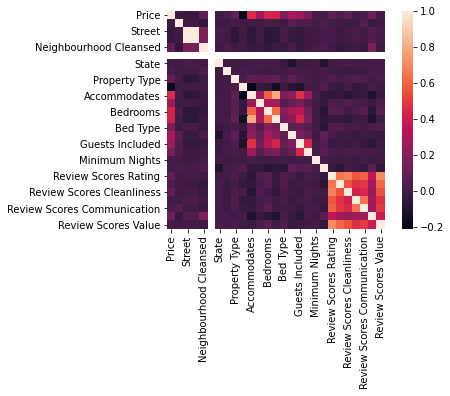

In [ ]:
cor = df_final.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
L=["Property Type","Bed Type","Neighbourhood Cleansed",]
for x in L:
  le=LabelEncoder()
  df_final[x] = le.fit_transform(df_final[x])
df_final.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Guests Included,Extra People
2,70.0,0,4,1.0,1.0,2.0,4,45.0,4,15
13,83.0,0,2,1.0,1.0,1.0,4,269.0,1,0
15,149.0,0,4,1.0,1.0,2.0,4,431.0,2,10
20,70.0,0,2,1.0,1.0,1.0,1,20.0,1,10
22,69.0,0,2,1.0,1.0,1.0,4,269.0,1,5


# Selection Features Lasso :

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_bnb=df[Total]
df_bnb=df_bnb.drop(["Neighbourhood"],axis=1)
# df_bnb["Square Feet"]=df5['sum']
df_bnb.head()
# df_bnb.select_dtypes(include=object).replace(np.nan," ")
# df_bnb=df_bnb.replace(np.nan,0)
# print(df_bnb.isna().sum(axis = 0))
# df_bnb.head(400)

,Price,Neighbourhood Cleansed,City,State,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Guests Included,Extra People,Minimum Nights,Number of Reviews,First Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,40.0,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,2,0.5,1.0,1.0,Pull-out Sofa,NaN,1,0,5,2,2016-06-10,90.0,8.0,9.0,10.0,10.0,10.0,10.0
1,140.0,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,NaN,1,0,1,1,2016-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,70.0,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,4,15,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276.0,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,NaN,1,0,6,25,2015-09-27,98.0,10.0,10.0,10.0,10.0,10.0,10.0
4,85.0,Hôtel-de-Ville,Paris,Île-de-France,Paris,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,NaN,1,14,1,210,2014-04-13,84.0,9.0,9.0,9.0,9.0,10.0,9.0


In [ ]:
L=["Price","Neighbourhood Cleansed","City","State","Market","Property Type","Room Type","Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Square Feet","Guests Included","Extra People","Minimum Nights","Number of Reviews","First Review","Review Scores Rating","Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location","Review Scores Value"]

for x in L:
  print(type(df_bnb[x][0]))
  if type(df_bnb[x][0])==str:
    df_bnb[x]=df_bnb[x].replace(np.nan," ")
    le=LabelEncoder()
    df_bnb[x] = le.fit_transform(df_bnb[x])
df_bnb=df_bnb.replace(np.nan,0)
df_bnb.head()

<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


,Price,Neighbourhood Cleansed,City,State,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Guests Included,Extra People,Minimum Nights,Number of Reviews,First Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,40.0,6,0,37,20,0,0,2,0.5,1.0,1.0,3,0.0,1,0,5,2,1854,90.0,8.0,9.0,10.0,10.0,10.0,10.0
1,140.0,6,0,37,20,0,0,1,1.0,0.0,1.0,4,0.0,1,0,1,1,2051,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,70.0,6,0,37,20,0,0,4,1.0,1.0,2.0,4,0.0,4,15,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,276.0,6,0,37,20,0,0,6,2.0,2.0,3.0,4,0.0,1,0,6,25,1598,98.0,10.0,10.0,10.0,10.0,10.0,10.0
4,85.0,6,0,37,20,0,0,3,1.0,1.0,2.0,4,0.0,1,14,1,210,1066,84.0,9.0,9.0,9.0,9.0,10.0,9.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_bnb.drop(["Price"], axis=1), df_bnb["Price"])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False])

In [ ]:
Selection=pd.Series(sel_.get_support(),index=list(df_bnb.drop(["Price"],axis=1)))
Selection["Price"]=True
print(Selection)

Neighbourhood Cleansed          True
City                           False
State                          False
Market                         False
Property Type                  False
Room Type                       True
Accommodates                    True
Bathrooms                       True
Bedrooms                        True
Beds                            True
Bed Type                        True
Square Feet                    False
Guests Included                 True
Extra People                    True
Minimum Nights                 False
Number of Reviews              False
First Review                    True
Review Scores Rating           False
Review Scores Accuracy         False
Review Scores Cleanliness       True
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location          True
Review Scores Value            False
Price                           True
dtype: bool


In [ ]:
df_final=df_bnb[Selection.index[Selection]]
df_final.head()


,Neighbourhood Cleansed,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,First Review,Review Scores Cleanliness,Review Scores Location,Price
0,6,0,2,0.5,1.0,1.0,3,1,0,1854,9.0,10.0,40.0
1,6,0,1,1.0,0.0,1.0,4,1,0,2051,10.0,10.0,140.0
2,6,0,4,1.0,1.0,2.0,4,4,15,0,0.0,0.0,70.0
3,6,0,6,2.0,2.0,3.0,4,1,0,1598,10.0,10.0,276.0
4,6,0,3,1.0,1.0,2.0,4,1,14,1066,9.0,10.0,85.0


In [ ]:
df_final["NewPrice"]=pd.qcut(df_final["Price"],20,duplicates='drop')
def interval_to_mean(x):
  y=((x.left+x.right)/2)
  return y
# df_final["NewPrice"]=df_final["NewPrice"].apply(interval_to_mean)
# df_final["NewPrice"].value_counts()
#df_final["Price"].value_counts()
#df_final.head()
# df_final.drop(["NewPrice"],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


XGBOOST


In [ ]:
import xgboost as xgb

In [ ]:
df_bnb=df[["Price","Host Location","Street","Neighbourhood","Neighbourhood Cleansed","City","State","Market","Property Type","Room Type","Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Square Feet","Guests Included","Extra People","Minimum Nights","Number of Reviews","First Review","Review Scores Rating","Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location","Review Scores Value"]]
df_bnb.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(["Price"], axis=1), df_final["Price"])
dtrain = xgb.DMatrix(data, label=label)
